<a href="https://colab.research.google.com/github/Patcharinee/Fashion_AI/blob/main/Fashion_AI_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion - inpainting

In [1]:
# Download Data files
# The data files include a sample model image, mask images, and output images.
!git clone https://github.com/Patcharinee/Fashion_AI_data.git /content/Fashion_AI_data/


# Download SAM Model Checkpoints
# Three model versions of the model are available with different backbone sizes.
# Use the links below to download the checkpoint for the corresponding model type.
# default or vit_b: ViT-B SAM model -> https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
# vit_l: ViT-L SAM model -> https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth
# vit_h: ViT-H SAM model -> https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

!wget -P /content/Fashion_AI_data/checkpoints/ https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

Cloning into '/content/Fashion_AI_data'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 2), reused 18 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 1.08 MiB | 3.27 MiB/s, done.
Resolving deltas: 100% (2/2), done.
--2025-04-17 08:33:27--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.15, 13.226.210.111, 13.226.210.78, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘/content/Fashion_AI_data/checkpoints/sam_vit_b_01ec64.pth’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M  25.9MB/s    in 7.3s    

2025-04-17 08:33:35 (48.8 MB/s) - ‘/content/Fashion_AI_data/checkpoints/sam_vit_b_01ec64.pth’ saved [37504

In [ ]:
# create necessary folders
!mkdir -p /content/Fashion_AI_data/Mask_images/
!mkdir -p /content/Fashion_AI_data/Output_images/

In [ ]:
###### Pip install ################

In [ ]:
# Install Segment Anything (https://github.com/facebookresearch/segment-anything#installation)
# need python>=3.8, as well as pytorch>=1.7 and torchvision>=0.8 before installing Segment Anything
# check your current versions
# !pip list

#Install Segment Anything:

!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-soyr77d5
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-soyr77d5
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=776cecf3de8574c9672f18cbcf69bc7893249584d4fcdb7164d90863e17b4a5d
  Stored in directory: /tmp/pip-ephem-wheel-cache-cnuh1yd5/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [ ]:
# Install Gradio for UI
!pip install --upgrade gradio
# Install Controlnet-aux
!pip install -q controlnet-aux

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.4/282.4 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66

In [ ]:
#################### Get Canny Image ###########################

In [ ]:
import numpy as np
import cv2
from PIL import Image, ImageDraw

def get_canny(image_file: str):

  image = load_image(image_file)

  # Get a Canny image
  image = np.array(image)
  canny_image = cv2.Canny(image, 200, 250) # (image, 200, 250)
  canny_image = canny_image[:, :, None]
  canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)
  canny_image = Image.fromarray(canny_image)

  return canny_image


In [ ]:

################ Download Stable Diffusion with Canny Controlnet models #######################
#import PIL
import requests
import torch
from io import BytesIO
from diffusers import StableDiffusionControlNetInpaintPipeline, ControlNetModel, UniPCMultistepScheduler
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image, make_image_grid


from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

controlnet2 = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)



###################### inpaint model #######################
model_id2 = "runwayml/stable-diffusion-inpainting"
#model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"
###############################################################

pipe2 = StableDiffusionControlNetInpaintPipeline.from_pretrained(
     model_id2, controlnet=controlnet2, torch_dtype=torch.float16
 )

# Move to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
#pipe.to(device)

# speed up diffusion process with faster scheduler and memory optimization
pipe2.scheduler = UniPCMultistepScheduler.from_config(pipe2.scheduler.config)
pipe2.enable_model_cpu_offload()

generator2 = torch.Generator(device=device).manual_seed(2)


/usr/local/lib/python3.11/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [ ]:
##################### SAMinference.py for segmentation and masking the parts of the image we want to change ###########################

In [ ]:
import os
import cv2
import torch
import numpy as np
import gradio as gr
from PIL import Image, ImageDraw
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from transformers import OwlViTProcessor, OwlViTForObjectDetection
import gc

models = {
	'vit_b': '/content/Fashion_AI_data/checkpoints/sam_vit_b_01ec64.pth',    #'./checkpoints/sam_vit_b_01ec64.pth'
	'vit_l': '', #'./checkpoints/sam_vit_l_0b3195.pth',
	'vit_h': '', #'./checkpoints/sam_vit_h_4b8939.pth'
}


# function to expand the mask area
def expand_mask(original_image, iterations):
	if not isinstance(original_image, np.ndarray):
		original_image = np.array(original_image)
	kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
	dilate = cv2.dilate(original_image, kernel, iterations=iterations)
	print(kernel)
	expand_im = Image.fromarray(dilate)

	# saving the final output as a PNG file
	expand_im.save('/content/Fashion_AI_data/Mask_images/expanded_output_mask'+str(iterations)+'.png') #'Mask_images/expanded_output_mask'+str(iterations)+'.png'

def plot_boxes(img, boxes):
	img_pil = Image.fromarray(np.uint8(img * 255)).convert('RGB')
	draw = ImageDraw.Draw(img_pil)
	for box in boxes:
		color = tuple(np.random.randint(0, 255, size=3).tolist())
		x0, y0, x1, y1 = box
		x0, y0, x1, y1 = int(x0), int(y0), int(x1), int(y1)
		draw.rectangle([x0, y0, x1, y1], outline=color, width=6)
	return img_pil


def segment_one(img, mask_generator, seed=None):
	if seed is not None:
		np.random.seed(seed)
	masks = mask_generator.generate(img)
	sorted_anns = sorted(masks, key=(lambda x: x['area']), reverse=True)
	mask_all = np.ones((img.shape[0], img.shape[1], 3))
	for ann in sorted_anns:
		m = ann['segmentation']
		color_mask = np.random.random((1, 3)).tolist()[0]
		for i in range(3):
			mask_all[m == True, i] = color_mask[i]
	result = img / 255 * 0.3 + mask_all * 0.7
	return result, mask_all


def generator_inference(device, model_type, points_per_side, pred_iou_thresh, stability_score_thresh,
                        min_mask_region_area, stability_score_offset, box_nms_thresh, crop_n_layers, crop_nms_thresh,
                        input_x, progress=gr.Progress()):
	# sam model
	sam = sam_model_registry[model_type](checkpoint=models[model_type]).to(device)
	mask_generator = SamAutomaticMaskGenerator(
		sam,
		points_per_side=points_per_side,
		pred_iou_thresh=pred_iou_thresh,
		stability_score_thresh=stability_score_thresh,
		stability_score_offset=stability_score_offset,
		box_nms_thresh=box_nms_thresh,
		crop_n_layers=crop_n_layers,
		crop_nms_thresh=crop_nms_thresh,
		crop_overlap_ratio=512 / 1500,
		crop_n_points_downscale_factor=1,
		point_grids=None,
		min_mask_region_area=min_mask_region_area,
		output_mode='binary_mask'
	)

	# input is image, type: numpy
	if type(input_x) == np.ndarray:
		result, mask_all = segment_one(input_x, mask_generator)
		return result, mask_all
	elif isinstance(input_x, str):  # input is video, type: path (str)
		cap = cv2.VideoCapture(input_x)  # read video
		frames_num = cap.get(cv2.CAP_PROP_FRAME_COUNT)
		W, H = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
		fps = int(cap.get(cv2.CAP_PROP_FPS))
		out = cv2.VideoWriter("output.mp4", cv2.VideoWriter_fourcc('x', '2', '6', '4'), fps, (W, H), isColor=True)
		while True:
			ret, frame = cap.read()  # read a frame
			if ret:
				result, mask_all = segment_one(frame, mask_generator, seed=2023)
				result = (result * 255).astype(np.uint8)
				out.write(result)
			else:
				break
		out.release()
		cap.release()
		return 'output.mp4'


def predictor_inference(device, model_type, input_x, selected_points, test_im):
	# sam model
	sam = sam_model_registry[model_type](checkpoint=models[model_type]).to(device)
	predictor = SamPredictor(sam)
	predictor.set_image(input_x)  # Process the image to produce an image embedding

	transformed_boxes = None

	# points
	if len(selected_points) != 0:
		points = torch.Tensor([p for p, _ in selected_points]).to(device).unsqueeze(1)
		labels = torch.Tensor([int(l) for _, l in selected_points]).to(device).unsqueeze(1)
		transformed_points = predictor.transform.apply_coords_torch(points, input_x.shape[:2])
		print(points.size(), transformed_points.size(), labels.size(), input_x.shape, points)
	else:
		transformed_points, labels = None, None

	# predict segmentation according to the boxes
	masks, scores, logits = predictor.predict_torch(
		point_coords=transformed_points,
		point_labels=labels,
		boxes=transformed_boxes,  # only one box
		multimask_output=False,
	)
	masks = masks.cpu().detach().numpy()
	#mask_all = np.ones((input_x.shape[0], input_x.shape[1], 3)) #white background
	mask_all = np.zeros((input_x.shape[0], input_x.shape[1], 3)) #black background
	for ann in masks:
		color_mask = np.random.random((1, 3)).tolist()[0]
		for i in range(3):
			#mask_all[ann[0] == True, i] = color_mask[i] #random color for mask area
			mask_all[ann[0] == True, i] = 1  #white color for mask area
	img = input_x / 255 * 0.3 + mask_all * 0.7

	# save the mask as a PNG file
	mask_img = Image.fromarray(np.uint8(mask_all * 255)).convert('RGB')
	mask_img.save('/content/Fashion_AI_data/Mask_images/output_mask.png')

	# save expanded mask as a PNG file
	expand_mask(mask_img,3)


	gc.collect()
	torch.cuda.empty_cache()
	return img, mask_all


def run_SAM_inference(device, model_type, points_per_side, pred_iou_thresh, stability_score_thresh, min_mask_region_area,
                  stability_score_offset, box_nms_thresh, crop_n_layers, crop_nms_thresh, input_x, test_im, selected_points=[]):

	if len(selected_points) != 0:  # user marked points
		print('use predictor_inference')
		print('prompt points length: ', len(selected_points))
		return predictor_inference(device, model_type, input_x, selected_points, test_im)
	else:
		print('use generator_inference')
		return generator_inference(device, model_type, points_per_side, pred_iou_thresh, stability_score_thresh,
		                           min_mask_region_area, stability_score_offset, box_nms_thresh, crop_n_layers,
		                           crop_nms_thresh, input_x)


In [ ]:
##################### Inpaintinference.py to perform inpainting with Controlnet Canny control ###########################

In [ ]:
#import gradio as gr
#from diffusers.utils import load_image
from PIL import Image
from numpy import asarray

def run_inpaint_openpose(input_prompt: str):
  try:
    original = load_image("/content/Fashion_AI_data/Output_images/original_input.png")
    mask_image = load_image("/content/Fashion_AI_data/Mask_images/expanded_output_mask3.png")

    openpose_image = openpose(original)
    openpose_image.save('/content/Fashion_AI_data/Output_images/openpose.png')
    output_text = "openpose image is saved to file"

    negative_prompt = "monochrome, lowres, bad anatomy, worst quality, low quality, deformed, ugly, bag, hand"

    output = pipe(
        prompt = input_prompt,
        image = original,
        control_image = openpose_image,
        controlnet_conditioning_scale = 1.0,
        mask_image = mask_image,
        negative_prompt = negative_prompt,
        generator = generator,
        num_inference_steps = 30,
        guidance_scale=7.5,
        strength=1.0,
        device=device
    )
    output_text = "inference finished"
    output.images[0].save("/content/Fashion_AI_data/Output_images/tryon_output.png")
    print("tryon_output is saved to file")
    output_text = "tryon_output is saved to file"

    return output_text
  except Exception as e:
    output_text = f"Error in image generation: {str(e)}"
    print(output_text)
    return output_text

def run_inpaint_canny(input_prompt: str):

  try:
    original = load_image("/content/Fashion_AI_data/Output_images/original_input.png")
    mask_image = load_image("/content/Fashion_AI_data/Mask_images/expanded_output_mask3.png")


    canny_image = get_canny("/content/Fashion_AI_data/Output_images/original_input.png")

    canny_image.save('/content/Fashion_AI_data/Output_images/canny.png')
    output_text = "canny image is saved to file"

    negative_prompt = "monochrome, lowres, bad anatomy, worst quality, low quality, deformed, ugly, bag, hand, nudity"

    # generate image
    #generator2 = torch.manual_seed(0)
    output = pipe2(
        prompt = input_prompt,
        num_inference_steps = 30,
        #generator=generator2,
        image = original,
        control_image = canny_image,
        controlnet_conditioning_scale = 0.3,
        mask_image = mask_image,
        negative_prompt = negative_prompt,
        guidance_scale = 13.0
    )

    output_text = "inference finished"
    output.images[0].save("/content/Fashion_AI_data/Output_images/tryon_output.png")
    print("tryon_output is saved to file")
    output_text = "tryon_output is saved to file"

    return output_text
  except Exception as e:
    output_text = f"Error in image generation: {str(e)}"
    print(output_text)
    return output_text

def run_tryon(text_prompt):
  output_text = run_inpaint_canny(text_prompt.value)
  return output_text




In [ ]:
############################ UI app #############################

In [ ]:
import os
import cv2
import numpy as np
import json
import random
from PIL import Image, ImageDraw, ImageFont
import asyncio
import requests
import base64
import gradio as gr
#from SAMinference import run_SAM_inference
#from InpaintInference import run_inpaint

import time
from threading import Thread

try_on_state = 0  # Global variable to track try-on status

tryon_output_file = "/content/Fashion_AI_data/Output_images/tryon_output.png"
original_file = "/content/Fashion_AI_data/Output_images/original_input.png"

def upload_image(init_image):
    init_image = gr.Image(sources='upload', type="numpy", label="your photo")
    return init_image

def transfer_image(source_image):
    copy_image = source_image.copy()
    if not isinstance(copy_image, np.ndarray):
        copy_image = np.array(copy_image)
    return copy_image

Example_textbox = gr.Textbox()
init_image = gr.Image(label="Model image")

# points color and marker for masking
colors = [(255, 0, 0), (0, 255, 0)]
markers = [1, 5]

# track whether the user edits the mask or not
edit_mask_status = 0
print(f"edit_mask_status: {edit_mask_status}")


with gr.Blocks(theme=gr.themes.Soft(primary_hue="purple", secondary_hue="indigo"), css = ".output-image, .input-image, .image-preview {height: 400px !important} ") as demo:
    gr.HTML(
        """
        <div style="display: flex; justify-content: center; align-items: center; text-align: center;">
        <div>
            <h1>Fashion Inspire : be inspired and have fun dressing up in any fashion style</h1>
            <h4>v0.1 (Beta)</h4>
            <h5 style="margin: 0;">learning | Sharing | Inspiring</h5>
            <div style="display: flex; justify-content: center; align-items: center; text-align: center;>

            </div>

        </div>
        <div style="display: flex; justify-content: center; align-items: center; text-align: center>
            <a href='https://github.com/Patcharinee/'><img src='https://img.shields.io/badge/Github-Repo-blue'></a>
        </div>
        </div>
        """)

    with gr.Row():
            # select model
            model_type = gr.Radio(["vit_b", "vit_l", "vit_h"], value='vit_b', label="Select Model", visible=False)
            # select device
            device = gr.Dropdown(["cpu", "cuda"], value='cuda', label="Select Device", visible=False)

    # SAM parameters
    with gr.Accordion(label='Parameters', open=False, visible=False):
        with gr.Row():
            points_per_side = gr.Number(value=32, label="points_per_side", precision=0,
                                        info='''The number of points to be sampled along one side of the image. The total
                                        number of points is points_per_side**2.''', visible=False)
            pred_iou_thresh = gr.Slider(value=0.88, minimum=0, maximum=1.0, step=0.01, label="pred_iou_thresh",
                                        info='''A filtering threshold in [0,1], using the model's predicted mask quality.''', visible=False)
            stability_score_thresh = gr.Slider(value=0.95, minimum=0, maximum=1.0, step=0.01, label="stability_score_thresh",
                                               info='''A filtering threshold in [0,1], using the stability of the mask under
                                               changes to the cutoff used to binarize the model's mask predictions.''', visible=False)
            min_mask_region_area = gr.Number(value=0, label="min_mask_region_area", precision=0,
                                             info='''If >0, postprocessing will be applied to remove disconnected regions
                                             and holes in masks with area smaller than min_mask_region_area.''', visible=False)
        with gr.Row():
            stability_score_offset = gr.Number(value=1, label="stability_score_offset",
                                               info='''The amount to shift the cutoff when calculated the stability score.''', visible=False)
            box_nms_thresh = gr.Slider(value=0.7, minimum=0, maximum=1.0, step=0.01, label="box_nms_thresh",
                                       info='''The box IoU cutoff used by non-maximal ression to filter duplicate masks.''', visible=False)
            crop_n_layers = gr.Number(value=0, label="crop_n_layers", precision=0,
                                      info='''If >0, mask prediction will be run again on crops of the image.
                                      Sets the number of layers to run, where each layer has 2**i_layer number of image crops.''', visible=False)
            crop_nms_thresh = gr.Slider(value=0.7, minimum=0, maximum=1.0, step=0.01, label="crop_nms_thresh",
                                        info='''The box IoU cutoff used by non-maximal suppression to filter duplicate
                                        masks between different crops.''', visible=False)

    # Segment image
    with gr.Row():
        with gr.Column(scale=2):
            # input image
            gr.Markdown("## Step 1 : Select a model and drop to the upload box or Upload your own photo")
            with gr.Tab(label='Original Image'):
                original_image = gr.State(value=None)   # store original image without points, default None
                input_image = gr.Image(type="numpy")
            model_example = gr.Examples(#inputs=init_image,
                                        inputs=input_image,
                                        examples_per_page=1,
                                        examples=["/content/Fashion_AI_data/Model_images/model.jpg"],
                                        label="",
                                        )

        # select part(s) of the image and generate a mask
        with gr.Column(scale=1):
            selected_points = gr.State([])      # store points
            gr.Markdown('## Step 2 : Click on the image to select the part(s) you want to change')
            undo_button = gr.Button('Undo selection')
            radio = gr.Radio(['foreground_point', 'background_point'], label='point labels',value='foreground_point', visible=False)

            # Generate Mask button
            mask_button = gr.Button("Generate Mask")
        with gr.Column(scale=2):
            # show the image with mask
            gr.Markdown('## Step 3 : Check and Edit the mask (if needed)')
            with gr.Tab(label='Image+Mask'):
                #output_image = gr.Image(type='numpy')
                test_im = gr.ImageEditor(
                    type='numpy',
                    brush=gr.Brush(colors=["#FFFFFF","#000000"]),
                    sources=None,
                    crop_size="1:1"
                    )

            # show only mask
            with gr.Tab(label='Generated Mask', visible=False):
                output_mask = gr.Image(type='numpy', sources=None)
            with gr.Tab(label='Editted Mask', visible=False):
                editted_mask = gr.Image(type='numpy', sources=None)
            with gr.Row():
                #save_button = gr.Button('Save mask')
                edit_button = gr.Button('Edit mask')

            #n_edit = gr.Number(0, label="Number of edit mask events", step=1)

    # Generate image
    gr.Markdown('## Step 4 : Enter an outfit you want to try-on')
    text_prompt = gr.Text(
        info='Enter an outfit you want to try',
        placeholder='a pink flowy evening dress',
        lines=3,
        show_label=False,
        )

    try_on = gr.Number(value=0, label="try-on status")

 ############ set try_on and try_on_state to 1 when the user enters text prompt #####
    def count_tryon(text_prompt):
      global try_on_state
      if len(text_prompt) > 0:
        try_on_state = 1
        return 1
      else:
        try_on_state = 0
        return 0

    gr.Interface(
        fn=count_tryon,
        inputs=[text_prompt],
        outputs=[try_on],
        flagging_mode="never"
    )

    def monitor_try_on():
        global try_on_state
        previous_state = try_on_state
        #openpose_file = "/content/Fashion_AI_data/Output_images/openpose.png"
        canny_file = "/content/Fashion_AI_data/Output_images/canny.png"
        tryon_output_file = "/content/Fashion_AI_data/Output_images/tryon_output.png"
        #original_file = "/content/Fashion_AI_data/Output_images/original_input.png"

        while True:
            if try_on_state != previous_state and try_on_state == 1:
                # Call run_tryon when try_on changes to 1

                # delete existing openpose and tryon output files
                if os.path.exists(canny_file):
                  os.remove(canny_file)
                if os.path.exists(tryon_output_file):
                  os.remove(tryon_output_file)

                run_tryon(text_prompt)
                try_on_state = 0  # Reset the flag

            previous_state = try_on_state
            time.sleep(1)  # Check every 1s

    # Start monitoring thread
    monitor_thread = Thread(target=monitor_try_on, daemon=True)
    monitor_thread.start()

    final_im = gr.Image(type='filepath', label="Try-on Result")
    def display_result(try_on):
       print("display result .....")
       print(f'try_on = {try_on}')
       if os.path.exists(tryon_output_file):
        print(f'from file -> {tryon_output_file}')
        return tryon_output_file
    gr.Interface(fn=display_result, inputs=None, outputs=final_im,
                 submit_btn="Display Try-on Result", clear_btn=None,
                 flagging_mode="never")


    # once user upload an image, the original image is stored in `original_image`
    def store_img(img):
        stored_img = Image.fromarray(img)
        stored_img.save("/content/Fashion_AI_data/Output_images/original_input.png")
        return img, []  # when new image is uploaded, `selected_points` should be empty
    input_image.upload(
        store_img,
        [input_image],
        [original_image, selected_points]
    )

    # user click the image to get points, and show the points on the image
    def get_point(img, sel_pix, point_type, evt: gr.SelectData):
        if point_type == 'foreground_point':
            sel_pix.append((evt.index, 1))   # append the foreground_point
        elif point_type == 'background_point':
            sel_pix.append((evt.index, 0))    # append the background_point
        else:
            sel_pix.append((evt.index, 1))    # default foreground_point
        # draw points
        for point, label in sel_pix:
            cv2.drawMarker(img, point, colors[label], markerType=markers[label], markerSize=20, thickness=5)
        if img[..., 0][0, 0] == img[..., 2][0, 0]:  # BGR to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img if isinstance(img, np.ndarray) else np.array(img)
    input_image.select(
        get_point,
        [input_image, selected_points, radio],
        [input_image],
    )

    # undo the selected point
    def undo_points(orig_img, sel_pix):
        temp = orig_img.copy()

        if len(sel_pix) != 0:
            sel_pix.pop()
            for point, label in sel_pix:
                cv2.drawMarker(temp, point, colors[label], markerType=markers[label], markerSize=20, thickness=5)
        if temp[..., 0][0, 0] == temp[..., 2][0, 0]:  # BGR to RGB
            temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        return temp if isinstance(temp, np.ndarray) else np.array(temp)
    undo_button.click(
        undo_points,
        [original_image, selected_points],
        [input_image]
    )


    mask_button.click(run_SAM_inference, inputs=[device, model_type, points_per_side, pred_iou_thresh, stability_score_thresh,
                                             min_mask_region_area, stability_score_offset, box_nms_thresh, crop_n_layers,
                                             crop_nms_thresh, original_image, test_im, selected_points],
                                              outputs=[test_im, output_mask])


    def send_to_edit2(before_img, test_im):
        to_edit_img = before_img.copy()
        if not isinstance(to_edit_img, np.ndarray):
            to_edit_img = np.array(to_edit_img)
        test_im["layers"].append(to_edit_img)
        return test_im


    edit_button.click(send_to_edit2,outputs=test_im, inputs=[output_mask,test_im])

    # Once an image is changed
    def preview_edit(im):
        global edit_mask_status
        edit_mask_status+=1
        print(f"edit_mask_status: {edit_mask_status}")
        return im["composite"]


    # save the editted mask and the expanded mask as 2 PNG files
    def save_mask(im):
        # save the editted mask
        mask_img = Image.fromarray(im["composite"])
        mask_img.save('/content/Fashion_AI_data/Mask_images/output_mask.png') #'Mask_images/output_mask.png'
        expand_mask(im["composite"],3)


    test_im.change(preview_edit, outputs=editted_mask, inputs=test_im)
    test_im.apply(save_mask, inputs=test_im)


if __name__ == "__main__":
    #demo.queue(max_size=10)
    demo.launch()
    #debug=True



edit_mask_status: 0


/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1024: UserWarning: Expected 1 arguments for function <function display_result at 0x7d4506244cc0>, received 0.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1028: UserWarning: Expected at least 1 arguments for function <function display_result at 0x7d4506244cc0>, received 0.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://20ee4f34c4e29ad2c5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
########## run inpaint function directly without using the UI ######################

We can also directly call the run_inpaint_canny function by running the cell below without using the UI. However, before calling the function, we need to upload the following files into specific folders and rename them accordingly:
1. Image of a person/model

  File path :  "/content/Fashion_AI_data/Output_images/original_input.png"
2. Mask image specifying the area where we want to change the outfit (white on black background)

  File path :  "/content/Fashion_AI_data/Mask_images/expanded_output_mask3.png"

  0%|          | 0/30 [00:00<?, ?it/s]

tryon_output is saved to file
Try-on casual plain white-colored flowy cotton beach dress


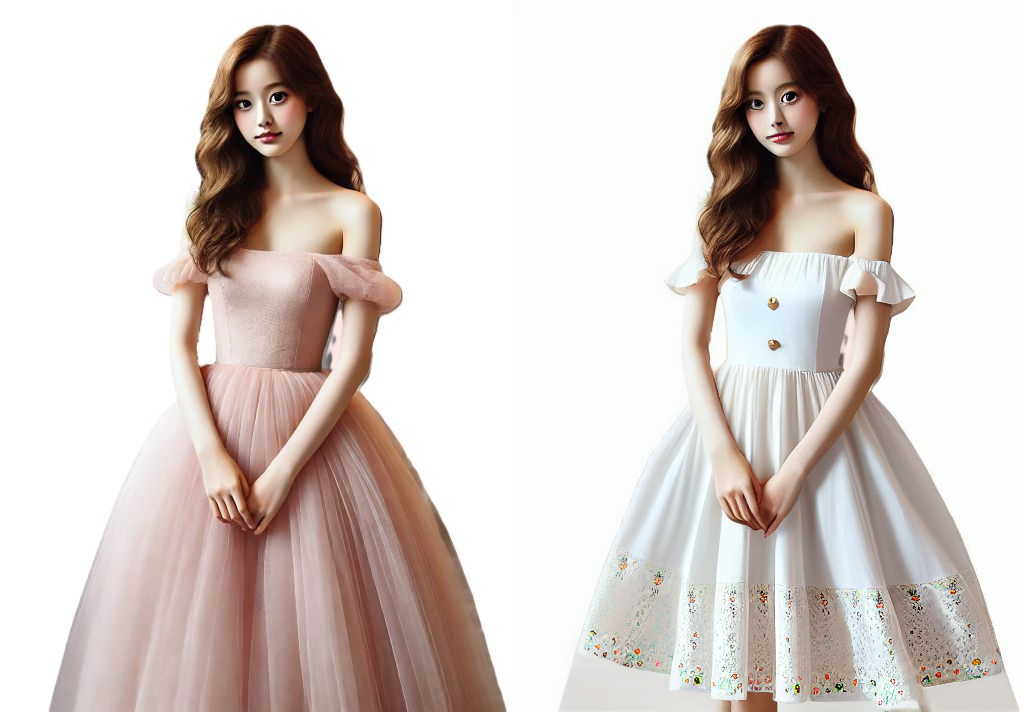

In [ ]:
# specify the input textprompt (outfit you would like to try-on) here
input_textprompt = "casual plain white-colored flowy cotton beach dress"

run_inpaint_canny(input_textprompt)
user_image = load_image('/content/Fashion_AI_data/Output_images/original_input.png')
result_image = load_image('/content/Fashion_AI_data/Output_images/tryon_output.png')
print(f'Try-on {input_textprompt}')
make_image_grid([user_image, result_image], rows=1, cols=2)

In [ ]:
###### Call pipeline directly ##############

Another method is to bypass the run_inpaint_canny function and call the Stable Diffusion ControlNet Inpaint Pipeline directly. This method gives you the flexibility to load your original model image and mask image from any source. Running the cells below will perform Canny edge detection on the original image and call the pipeline to generate the output result.

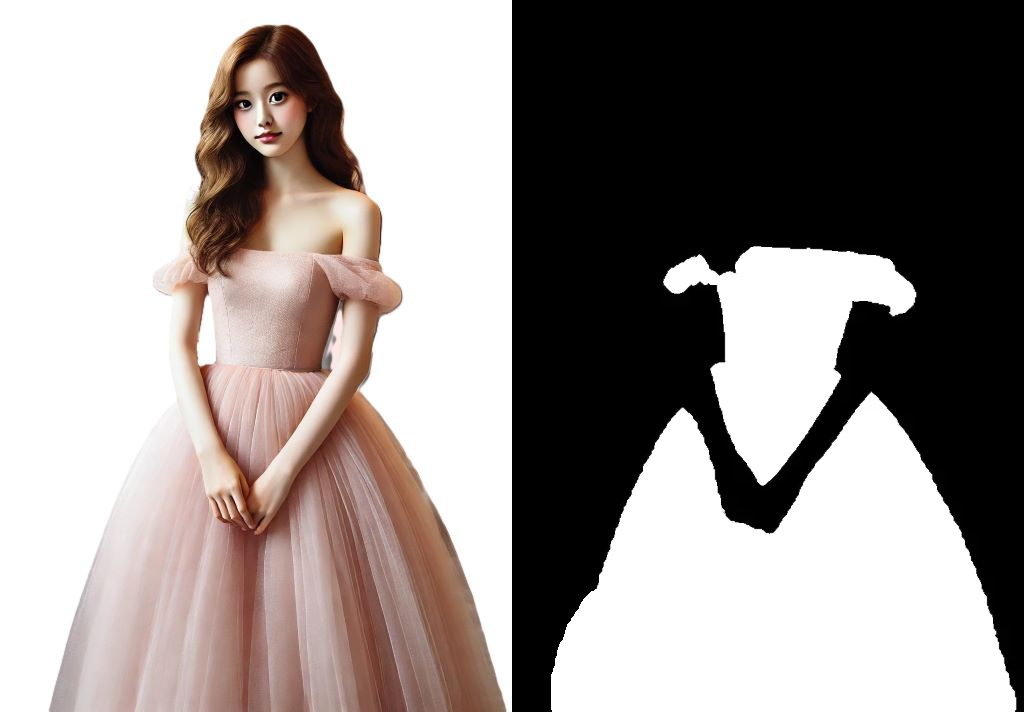

In [ ]:

# download an image

image = load_image("/content/Fashion_AI_data/Output_images/original_input.png")
mask_image = load_image("/content/Fashion_AI_data/Mask_images/expanded_output_mask3.png")

make_image_grid([image, mask_image], rows=1, cols=2)

In [ ]:

################ Download Stable Diffusion with openpose Controlnet models #######################
#import PIL
import requests
import torch
from io import BytesIO
from diffusers import StableDiffusionControlNetInpaintPipeline, ControlNetModel, UniPCMultistepScheduler
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image, make_image_grid


from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

controlnet2 = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)



###################### inpaint model #######################
model_id2 = "runwayml/stable-diffusion-inpainting"
#model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"
###############################################################

pipe2 = StableDiffusionControlNetInpaintPipeline.from_pretrained(
     model_id2, controlnet=controlnet2, torch_dtype=torch.float16
 )

# Move to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
#pipe.to(device)

# speed up diffusion process with faster scheduler and memory optimization
pipe2.scheduler = UniPCMultistepScheduler.from_config(pipe2.scheduler.config)
pipe2.enable_model_cpu_offload()

generator2 = torch.Generator(device=device).manual_seed(2)


/usr/local/lib/python3.11/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


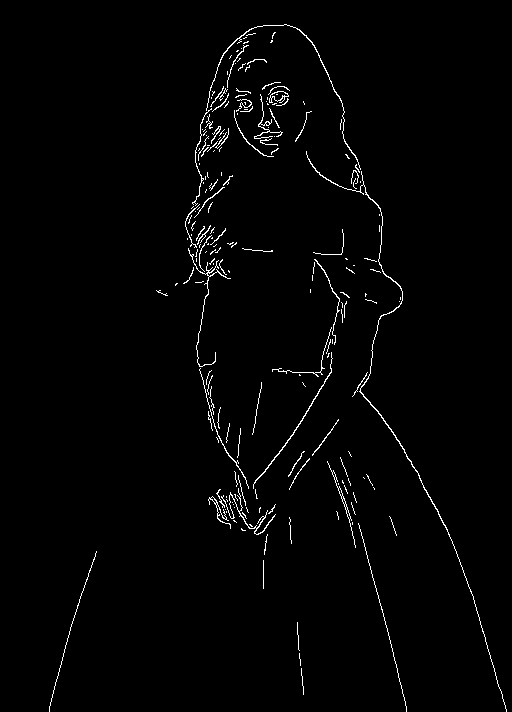

In [ ]:
################### get canny image
import numpy as np
import cv2
from PIL import Image, ImageDraw

# download an image
image = load_image("/content/Fashion_AI_data/Output_images/original_input.png")
mask_image = load_image("/content/Fashion_AI_data/Mask_images/expanded_output_mask3.png")


# Get a Canny image
image = np.array(image)
mask_image = np.array(mask_image)
canny_image = cv2.Canny(image, 200, 250)
canny_image = canny_image[:, :, None]
canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)

image=Image.fromarray(image)
mask_image=Image.fromarray(mask_image)
canny_image = Image.fromarray(canny_image)

canny_image

  0%|          | 0/30 [00:00<?, ?it/s]

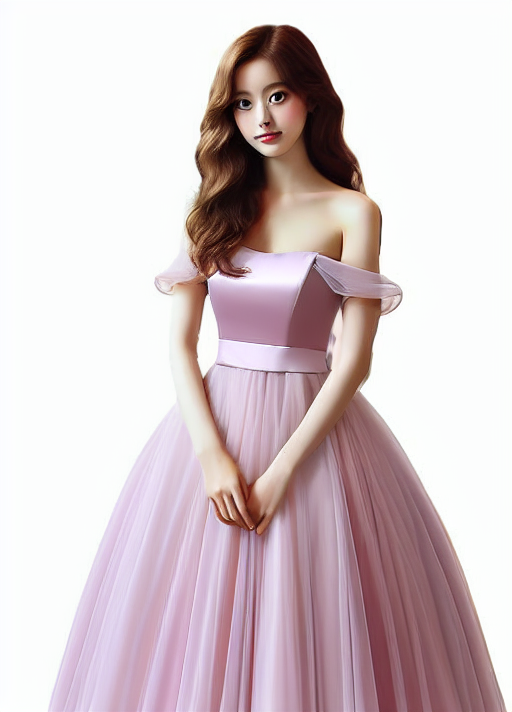

In [ ]:
# Enter a text prompt
text_prompt="a light purple-colored evening dress."

# Enter Negative prompt
negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality, deformed, ugly, hand, bag, nudity"
# generate image
#generator2 = torch.manual_seed(2)
new_image = pipe2(
    text_prompt,
    num_inference_steps=30,
    #generator=generator2,
    image=image,
    control_image=canny_image,
    controlnet_conditioning_scale = 0.3,
    mask_image=mask_image,
    negative_prompt=negative_prompt,
    guidance_scale=13.0
).images[0]

new_image

  0%|          | 0/30 [00:00<?, ?it/s]

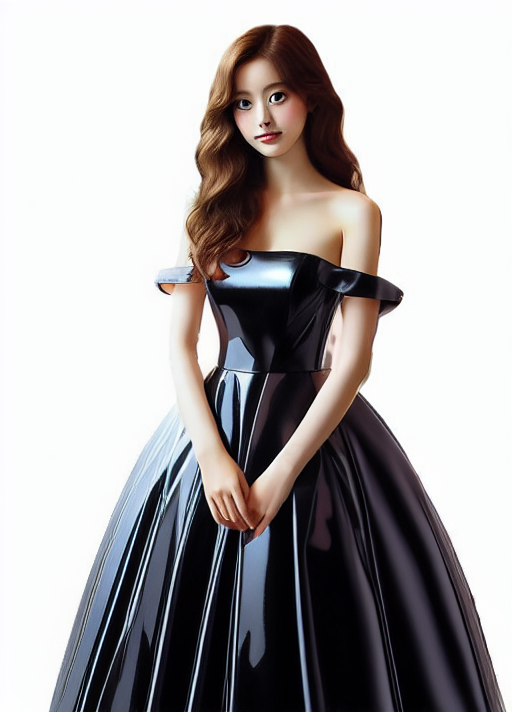

In [ ]:
# Enter a text prompt
text_prompt="a black-colored metallic dress. Robot style."

# Enter Negative prompt
negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality, deformed, ugly, hand, bag, nudity"
# generate image
#generator2 = torch.manual_seed(2)
new_image = pipe2(
    text_prompt,
    num_inference_steps=30,
    #generator=generator2,
    image=image,
    control_image=canny_image,
    controlnet_conditioning_scale = 0.3,
    mask_image=mask_image,
    negative_prompt=negative_prompt,
    guidance_scale=13.0
).images[0]

new_image

  0%|          | 0/30 [00:00<?, ?it/s]

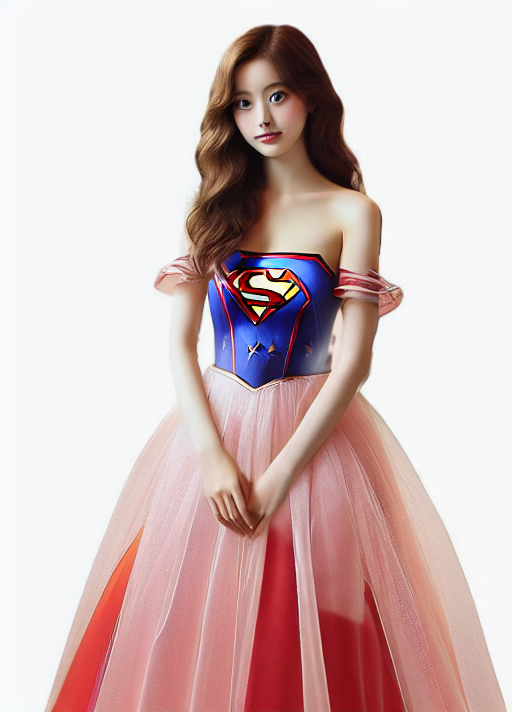

In [ ]:
# Enter a text prompt
text_prompt="a superhero outfit."

# Enter Negative prompt
negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality, deformed, ugly, hand, bag, nudity"
# generate image
#generator2 = torch.manual_seed(2)
new_image = pipe2(
    text_prompt,
    num_inference_steps=30,
    #generator=generator2,
    image=image,
    control_image=canny_image,
    controlnet_conditioning_scale = 0.3,
    mask_image=mask_image,
    negative_prompt=negative_prompt,
    guidance_scale=13.0
).images[0]

new_image

  0%|          | 0/30 [00:00<?, ?it/s]

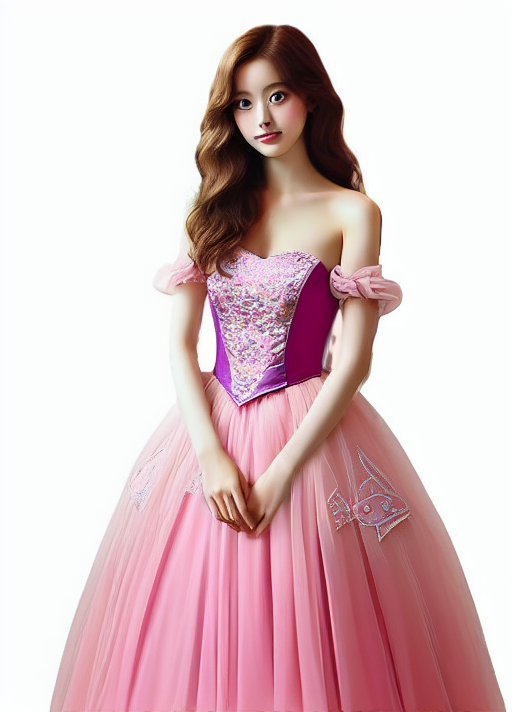

In [ ]:
# Enter a text prompt
text_prompt="a pink flowy disney Aurora princess outfit."

# Enter Negative prompt
negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality, deformed, ugly, hand, bag, nudity"
# generate image
#generator2 = torch.manual_seed(2)
new_image = pipe2(
    text_prompt,
    num_inference_steps=30,
    #generator=generator2,
    image=image,
    control_image=canny_image,
    controlnet_conditioning_scale = 0.3,
    mask_image=mask_image,
    negative_prompt=negative_prompt,
    guidance_scale=13.0
).images[0]

new_image